In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

from matplotlib.colors import LogNorm
import healpy as hp

In [2]:
params = {'figure.facecolor': 'w'}
plt.rcParams.update(params)

In [3]:
cat = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/data/gaia_dr3/xp_synthetic_decam_photometry/tmp/gaia_dr3_all_xp_spectra_obj.fits', columns=['ra', 'dec']))
print(len(cat))

219120650


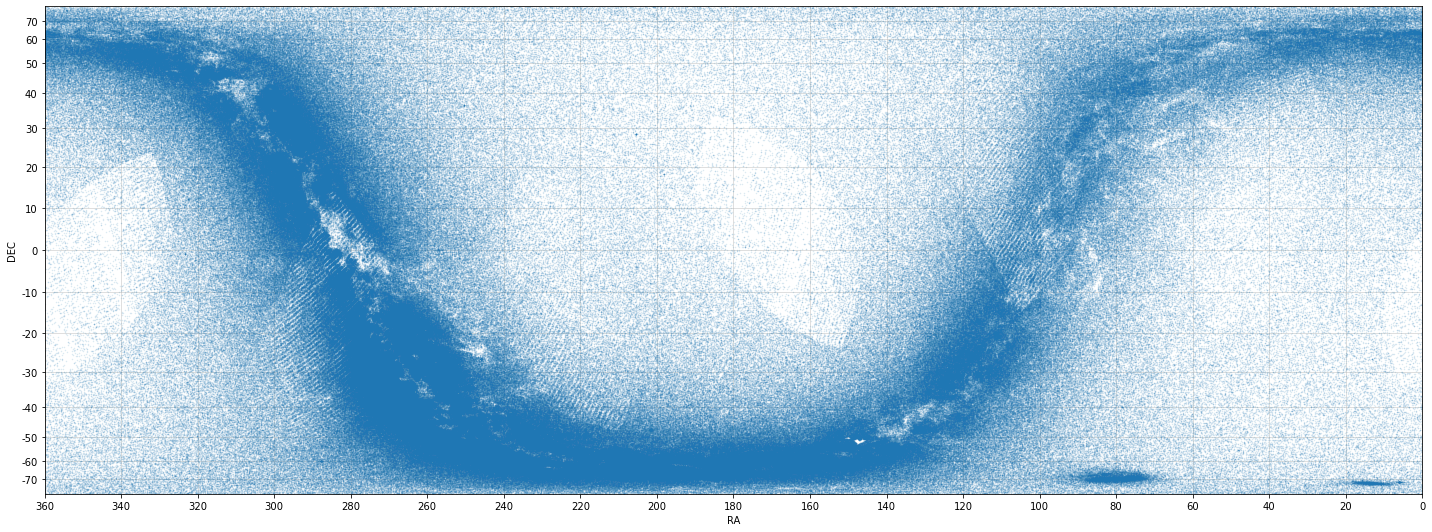

In [4]:
np.random.seed(88718)
idx = np.random.choice(len(cat), size=len(cat)//100)

mask = np.full(len(cat), True)
fig, ax = plt.subplots(figsize=(20, 7.5))
# ax.plot(cat['ra'][mask], np.sin(np.radians(cat['dec'][mask])), '.', ms=1, alpha=0.15)
ax.plot(cat['ra'][idx], np.sin(np.radians(cat['dec'][idx])), '.', ms=1, alpha=0.15)
ax.axis([360, 0, -1., 1.])
ax.set_yticks(np.sin(np.radians(np.arange(-70, 80, 10))))
ax.set_yticklabels(np.arange(-70, 80, 10))
ax.set_xticks(np.arange(0, 361, 20))
ax.grid(alpha=0.5)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
plt.tight_layout()
plt.show()

147.6086956521739 -51.25580694880492


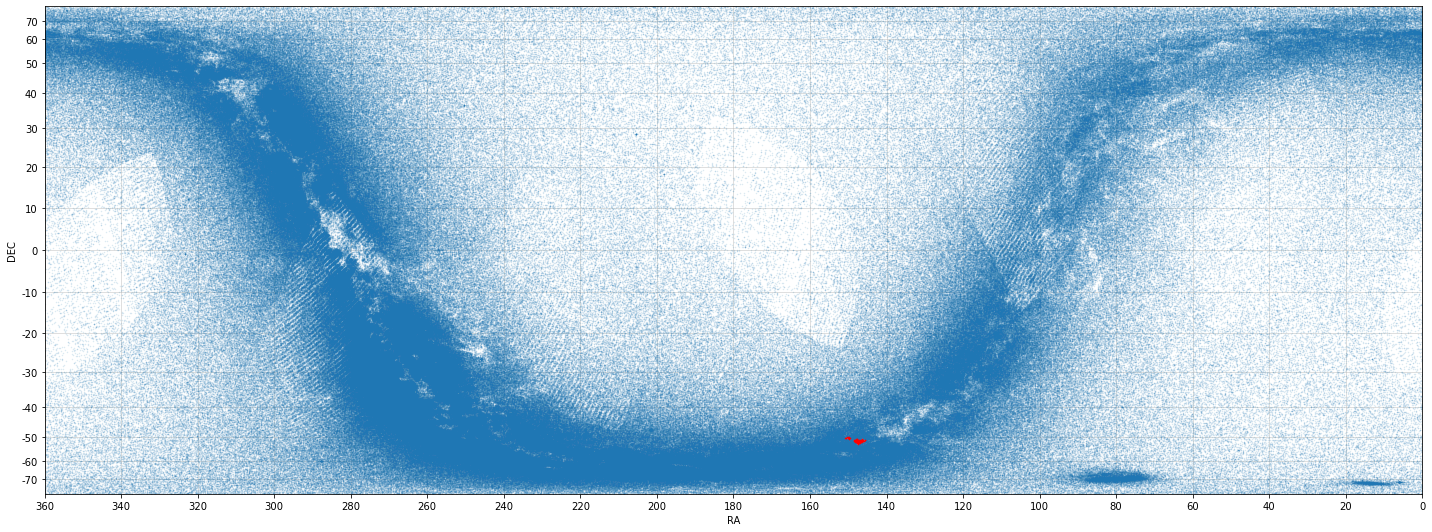

In [5]:
# Missing file

ra, dec = hp.pix2ang(256, np.arange(614517, 614573+1), nest=True, lonlat=True)
print(np.median(ra), np.median(dec))

np.random.seed(88718)
idx = np.random.choice(len(cat), size=len(cat)//100)

mask = np.full(len(cat), True)
fig, ax = plt.subplots(figsize=(20, 7.5))
# ax.plot(cat['ra'][mask], np.sin(np.radians(cat['dec'][mask])), '.', ms=1, alpha=0.15)
ax.plot(cat['ra'][idx], np.sin(np.radians(cat['dec'][idx])), '.', ms=1, alpha=0.15)
ax.plot(ra, np.sin(np.radians(dec)), 'rx', ms=1, alpha=1)
ax.axis([360, 0, -1., 1.])
ax.set_yticks(np.sin(np.radians(np.arange(-70, 80, 10))))
ax.set_yticklabels(np.arange(-70, 80, 10))
ax.set_xticks(np.arange(0, 361, 20))
ax.grid(alpha=0.5)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
plt.tight_layout()
plt.show()

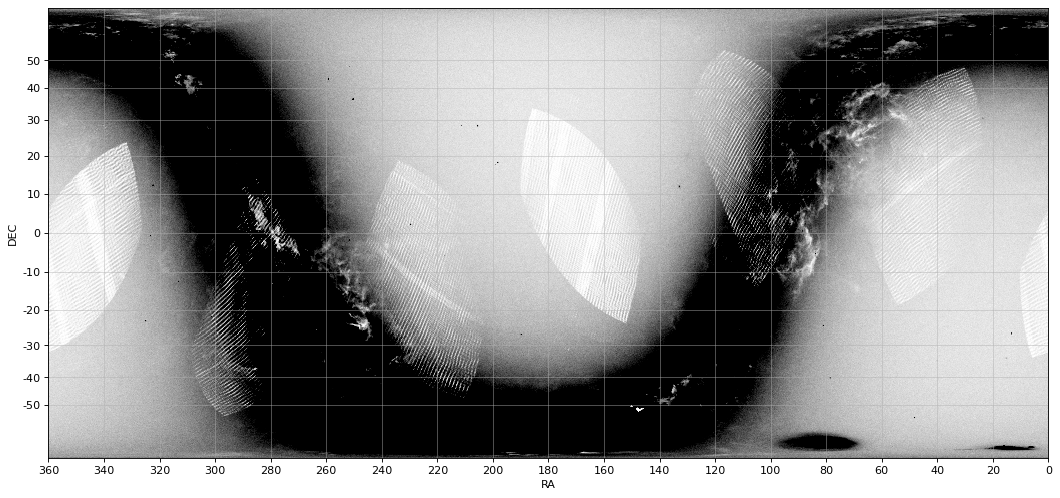

In [8]:
x = cat['ra']
y = np.sin(np.radians(cat['dec']))
xbins, ybins = np.linspace(0, 360, 1000), np.linspace(-1., 1., 450)
xpixels, ypixels = len(xbins), len(ybins)
figsize = xpixels / 80, ypixels / 80
fig = plt.figure(figsize=figsize, dpi=80)
ax = fig.add_axes([0, 0, 1, 1])
ax.hist2d(x, y, bins=[xbins, ybins], cmap='gray_r', vmin=0, vmax=500)
ax.axis([360, 0, -1., 1.])
ax.set_yticks(np.sin(np.radians(np.arange(-50, 60, 10))))
ax.set_yticklabels(np.arange(-50, 60, 10))
ax.set_xticks(np.arange(0, 361, 20))
ax.grid(alpha=0.5)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
# plt.savefig('test.png')
plt.show()

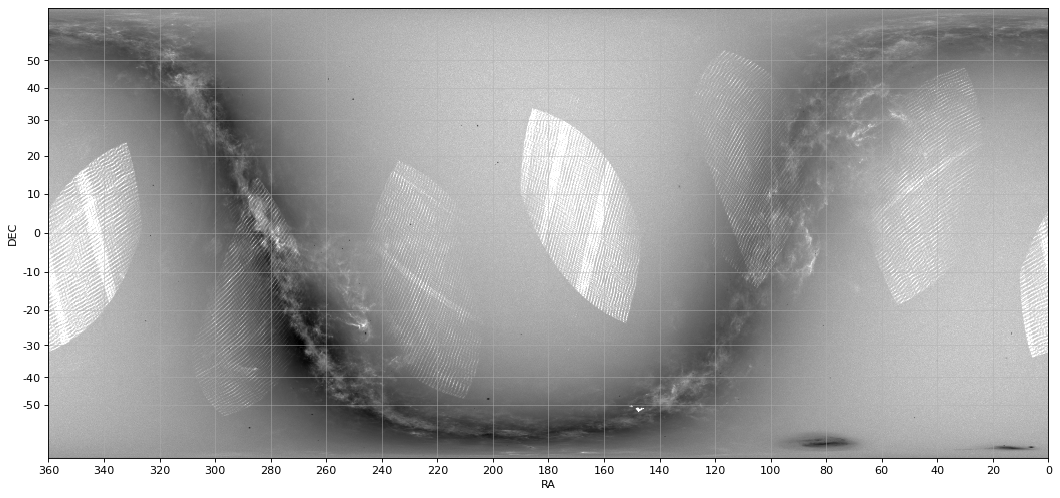

In [7]:
x = cat['ra']
y = np.sin(np.radians(cat['dec']))
xbins, ybins = np.linspace(0, 360, 1000), np.linspace(-1., 1., 450)
xpixels, ypixels = len(xbins), len(ybins)
figsize = xpixels / 80, ypixels / 80
fig = plt.figure(figsize=figsize, dpi=80)
ax = fig.add_axes([0, 0, 1, 1])
ax.hist2d(x, y, bins=[xbins, ybins], cmap='gray_r', norm=LogNorm(vmin=10, vmax=20000))
ax.axis([360, 0, -1., 1.])
ax.set_yticks(np.sin(np.radians(np.arange(-50, 60, 10))))
ax.set_yticklabels(np.arange(-50, 60, 10))
ax.set_xticks(np.arange(0, 361, 20))
ax.grid(alpha=0.5)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
# plt.savefig('test.png')
plt.show()